In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

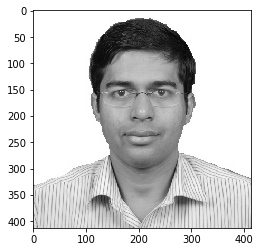

In [3]:
#Loading the image to be tested
test_image = cv2.imread('image.jpg')

#Converting to grayscale
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying the grayscale image
plt.imshow(test_image_gray, cmap='gray')
#Since we know that OpenCV loads an image in BGR format, so we need to convert it into RBG format to be able to display its true colors. Let us write a small function for that.

In [4]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [7]:
#haar_cascade_face = cv2.CascadeClassifier('C:\\Users\\Dell\\PycharmProjects\\FaceDetection\\venv\\Lib\\site-packages\\opencv_python-4.1.2.30.dist-info\\haarcascade_frontalface_default.xml')

haar_cascade_face = cv2.CascadeClassifier('D:\\Data Science\\Anaconda_Full\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')

In [8]:
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))


Faces found:  1


In [9]:
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

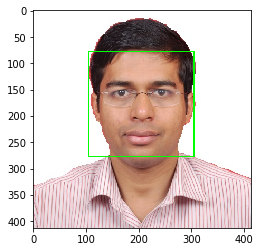

In [10]:
#convert image to RGB and show image

plt.imshow(convertToRGB(test_image))

In [13]:
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()

    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)

    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 15)

    return image_copy

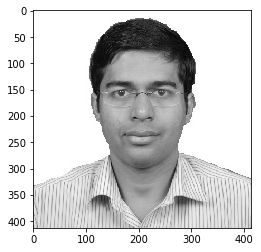

In [13]:
#loading image
test_image2 = cv2.imread('baby2.jpg')

# Converting to grayscale
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying grayscale image
plt.imshow(test_image_gray, cmap='gray')

In [12]:
#call the function to detect faces
3faces = detect_faces(haar_face_cascade, test_image2)

#convert to RGB and display image
#plt.imshow(convertToRGB(faces))

NameError: name 'haar_face_cascade' is not defined

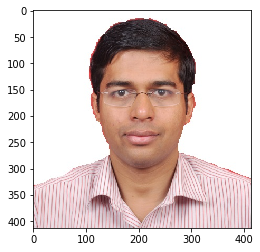

In [14]:
# Matplotlib to plot an image in RGB

image = cv2.imread('image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [17]:
#plot by removing the axis

def show(img):
    fig, ax = plt.subplots(1, figsize=(12,8))
    ax.axis('off')   
    plt.imshow(img, cmap='Greys')

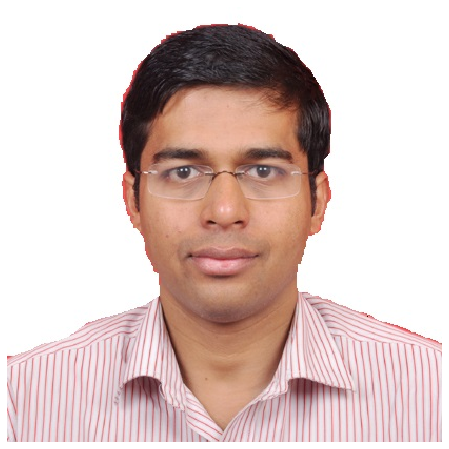

In [18]:
image = cv2.imread('image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show(image)

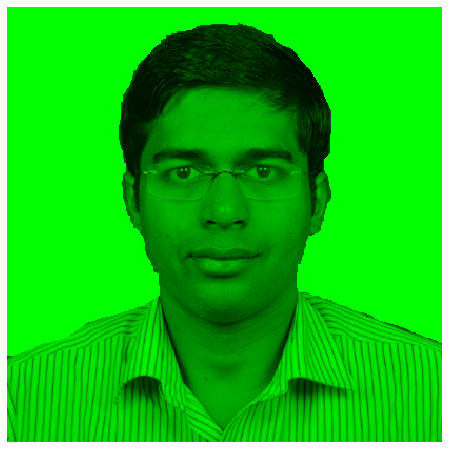

In [19]:
# converting image to only green

img = cv2.imread('image.jpg')
B, G, R = cv2.split(img) 
img = cv2.merge([B*0, G, R*0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
show(img)

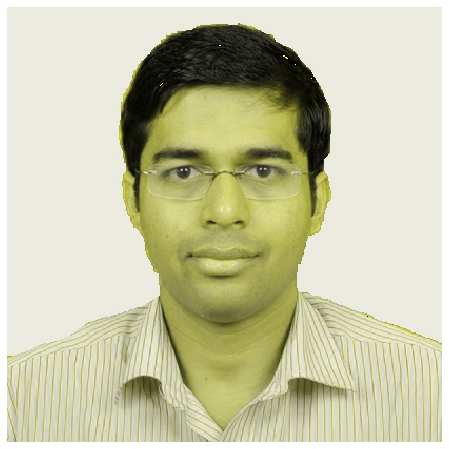

In [23]:
# image in other formats - HSV and HSL where HSV is Hue, Saturation, and Value
img = cv2.imread('image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(img)
 
img = cv2.merge([np.ones_like(H)*30, S+10, V-20])
img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
# fishow(img)

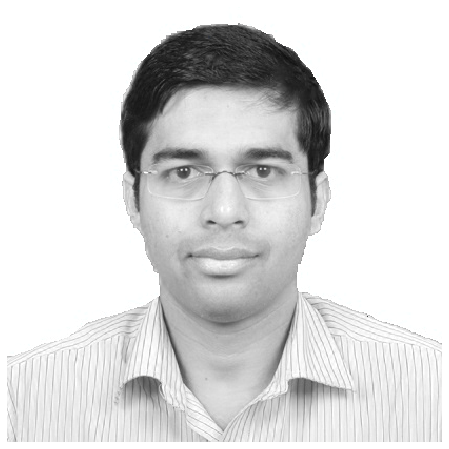

In [25]:
#filter few colours and make it to grayscale

# read img and convert to HSV
img = cv2.imread('image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# split dimensions
H, S, V = cv2.split(img)
# upper and lower boundaries
lower = np.array([80, 0, 0]) 
upper = np.array([120, 255, 255])
# build mask
mask = cv2.inRange(img, lower, upper)
# apply mask to saturation
S = cv2.bitwise_and(S, S, mask=mask)
# assemble image
img = cv2.merge([H, S, V])
# convert to RGB and display
img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
# show image show(img)

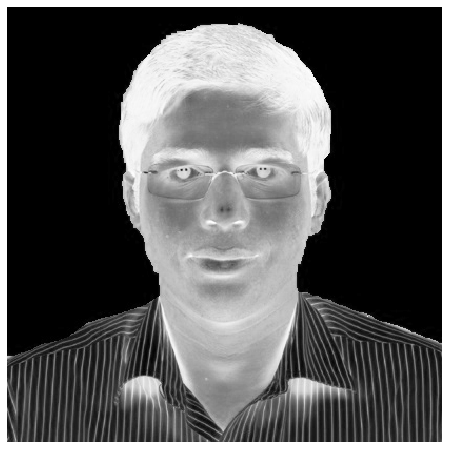

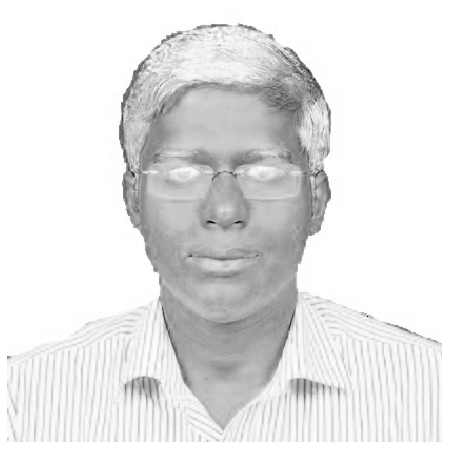

In [27]:
#shw image to BLUES or SATURATION

img = cv2.imread('image.jpg')
B, G, R = cv2.split(img) 
show(B)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(img)
show(S)